Exploratory Data Analysis

Roles to Explore:

In [2]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [3]:
#Filter for Data Analyst roles in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

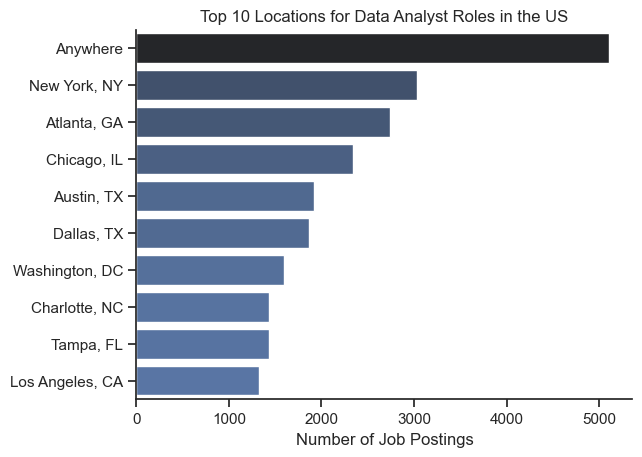

In [25]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()   
plt.title('Top 10 Locations for Data Analyst Roles in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()


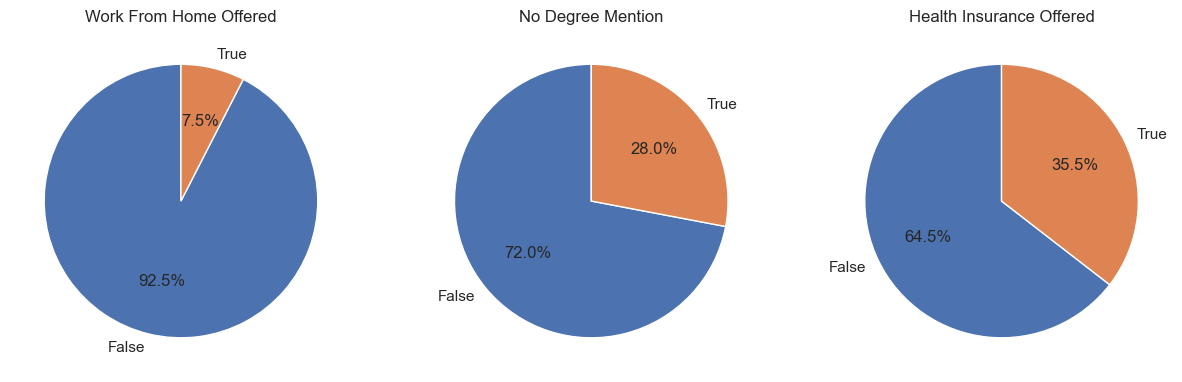

In [28]:
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'No Degree Mention',
    'job_health_insurance': 'Health Insurance Offered',
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

for i, (column,title) in enumerate(dict_column.items()):
    #print(i, column, title)
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)


plt.show()

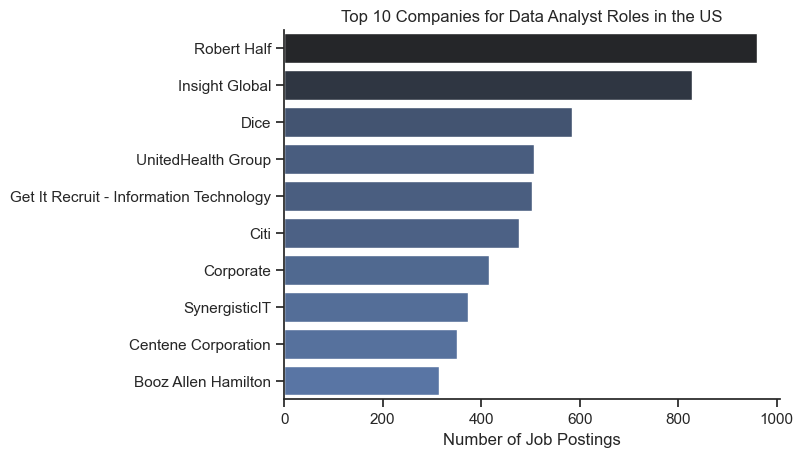

In [30]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()   
plt.title('Top 10 Companies for Data Analyst Roles in the US')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()